In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
cars = pd.read_csv("Car details.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
cars = cars.dropna(how = 'any')

cars.shape

(7906, 13)

In [5]:
import re

In [6]:
res = '190Nm@ 2,000rpm'.replace(".", "")
res = res.replace(",", "")
a =  [int(s) for s in re.findall(r'\d+', res)]
a

[190, 2000]

In [7]:
torque_list = cars['torque'].to_list()
# torque_list[:2]
torque_rpm = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [8]:
cars['torque_rpm'] = torque_rpm

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


In [9]:
mil_list = cars['mileage'].to_list()
# torque_list[:2]
mil_kmpl = []
def extractingmil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [10]:
cars['mil_kmpl'] = mil_kmpl

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10


In [11]:
engine_list = cars['engine'].to_list()
# torque_list[:2]
engine_cc = []
def extractingEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [12]:
cars['engine_cc'] = engine_cc

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10,1298.0


In [13]:
power_list = cars['max_power'].to_list()
# torque_list[:2]
max_power = []
def extractingPower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [14]:
cars['max_power_new'] = max_power

cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,16.10,1298.0,88.20


In [15]:
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [16]:
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000


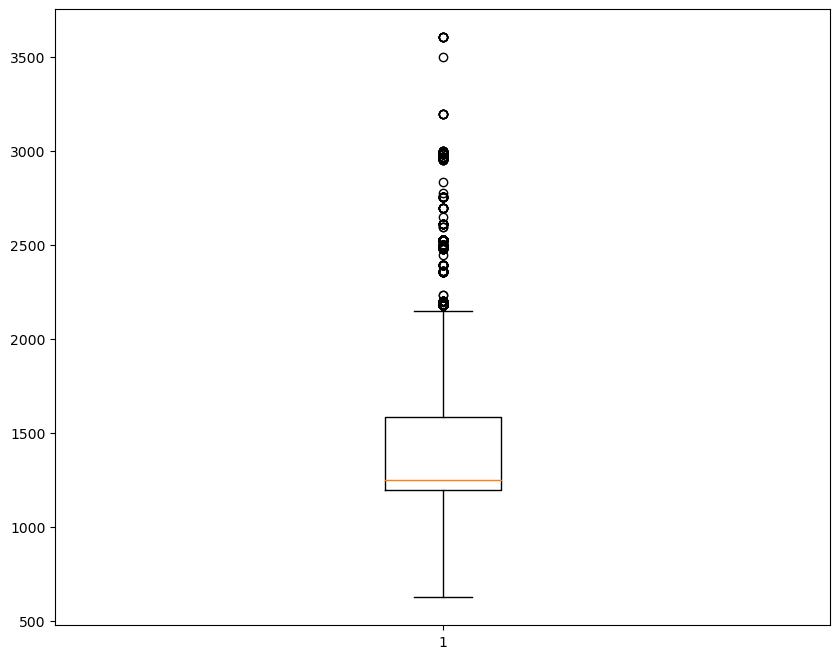

In [17]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(cars_new['engine_cc'])
# Display the plot
plt.show()

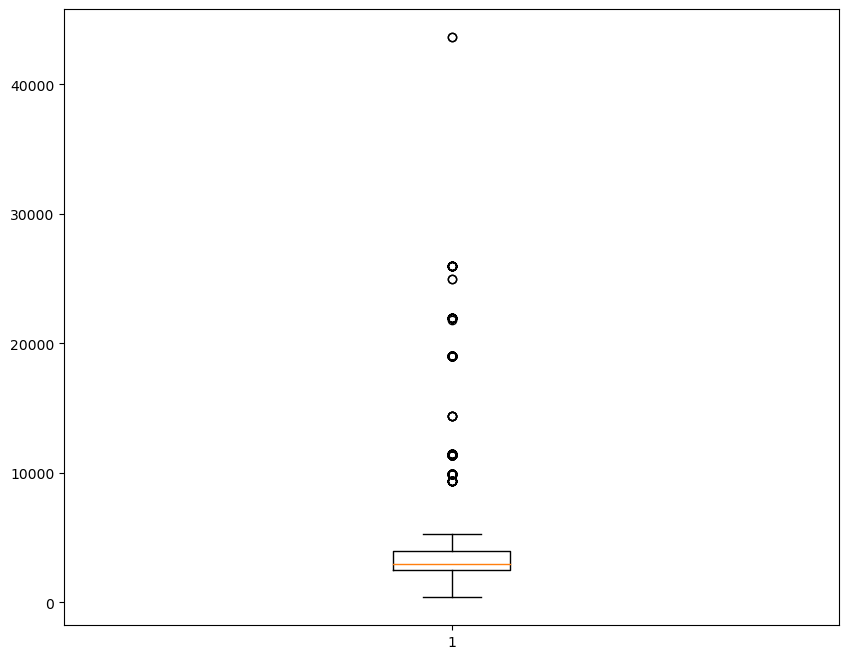

In [18]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(cars_new['torque_rpm'])
# Display the plot
plt.show()

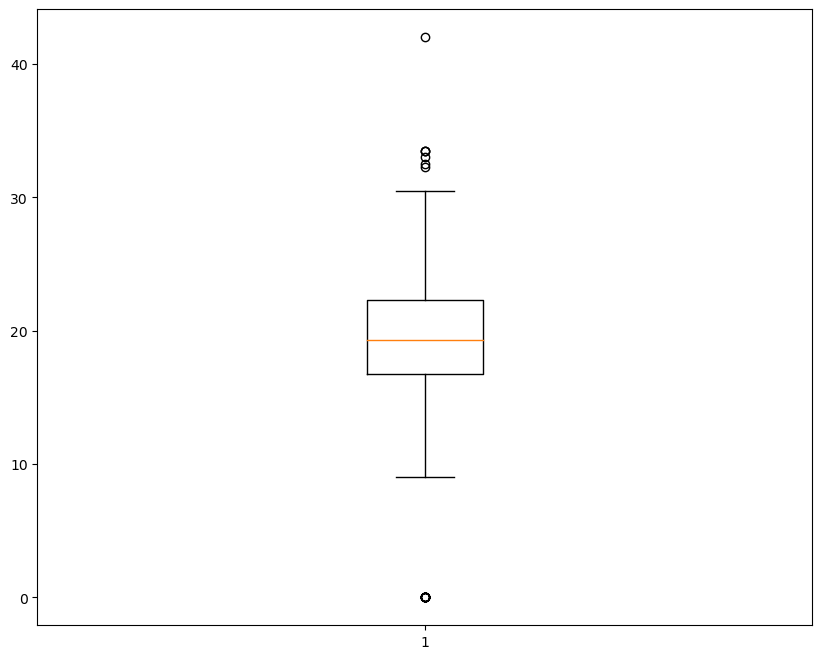

In [19]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(cars_new['mil_kmpl'])
# Display the plot
plt.show()

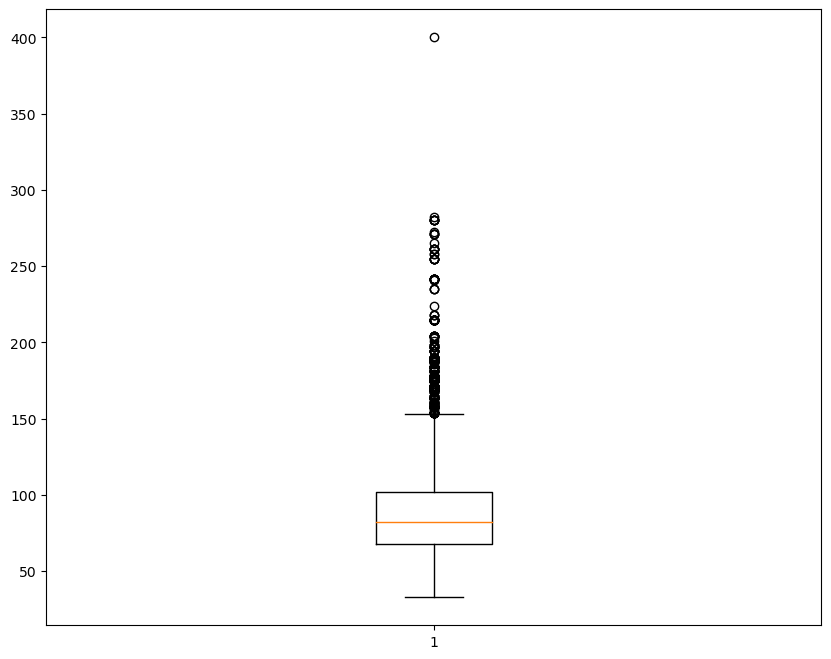

In [20]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(cars_new['max_power_new'])
# Display the plot
plt.show()

In [21]:
# Function to extract the first word
def extract_brand(name):
    return name.split()[0]

# Apply the function to create the "brand" column
cars_new['brand'] = cars_new['name'].apply(extract_brand)

# Display the DataFrame
cars_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,Maruti


In [22]:
cars_new = cars_new.drop(['name'], axis = 1)


In [23]:
cars_new.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20,Maruti


In [24]:
cars_encoded = pd.get_dummies(cars_new, columns=['fuel', 'seller_type', 'transmission', 'owner','brand']).astype(int)
# Display the encoded DataFrame


In [26]:
cars_encoded.head()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,fuel_CNG,fuel_Diesel,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,2014,450000,145500,5,2000,23,1248,74,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,5,2500,21,1498,103,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2006,158000,140000,5,2700,17,1497,78,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,5,2750,23,1396,90,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,5,4500,16,1298,88,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

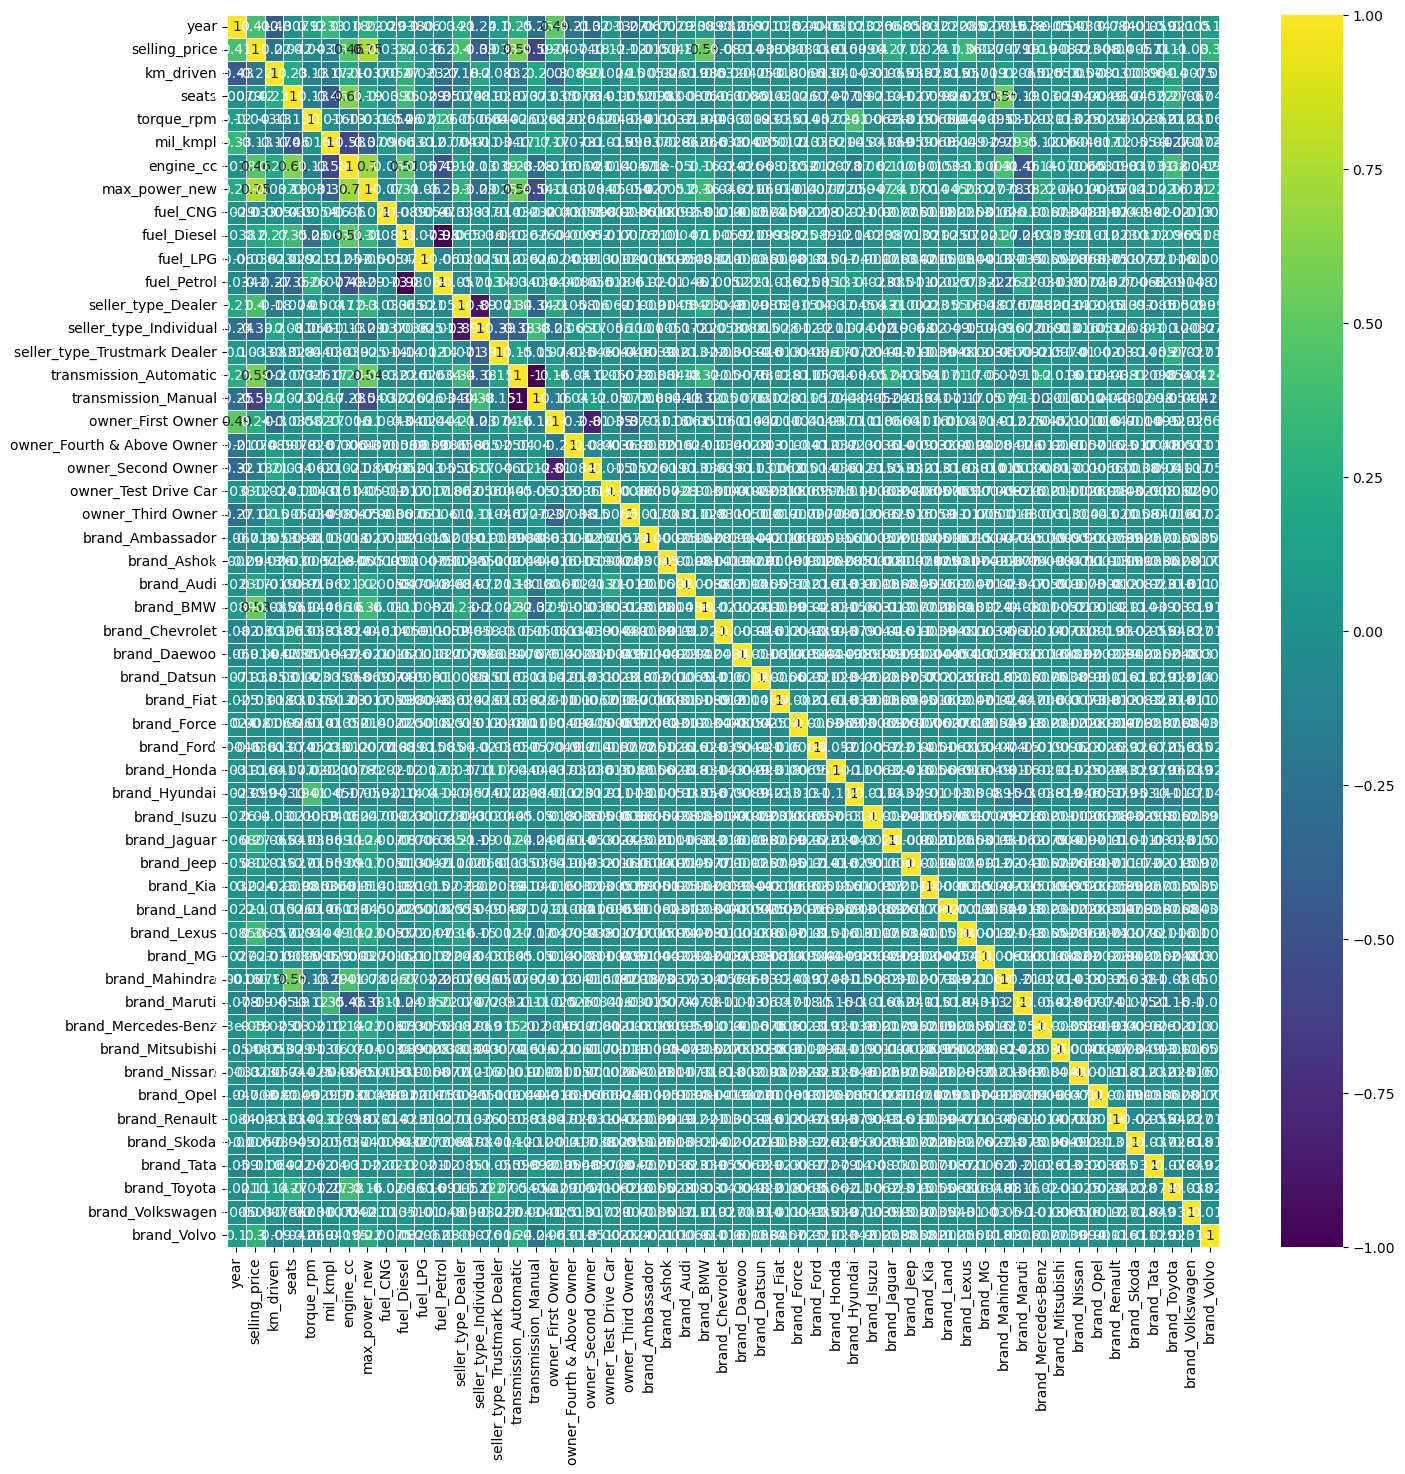

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(cars_encoded.corr(),annot=True,cmap='viridis',linewidths=.5)

In [27]:
import statsmodels.api as sm

y = cars_encoded['selling_price']
X = cars_encoded.drop(['selling_price'], axis = 1)

In [28]:
x = sm.add_constant(X)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     975.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:50:19   Log-Likelihood:            -1.1121e+05
No. Observations:                7906   AIC:                         2.225e+05
Df Residuals:                    7858   BIC:                         2.229e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -3.857e+07   1.17e+06    -32.959      0.000   -4.09e+07   -3.63e+07
year                          4.491e+04   1356.466     33.105      0.000    4.22e+04    4.76e+04
km_driven                       -0.6294      0.075     -8.409      0.000      -0.776      -0.483
seats                        -4777.7021   6064.409     -0.788      0.431   -1.67e+04    7110.153
torque_rpm                      -7.3252      1.567     -4.676      0.000     -10.396      -4.254
mil_kmpl                     -3345.6660   1617.511     -2.068      0.039   -6516.418    -174.914
engine_cc                       49.5156     18.643      2.656      0.008      12.970      86.061
max_power_new                 6307.2744    206.084     30.605      0.000    5903.294    6711.255
fuel_CNG                     -9.728e+06   2.96e+05    -32.846      0.000   -1.03e+07   -9.15e+06
fuel_Diesel                  -9.597e+06   2.92e+05    -32.827      0.000   -1.02e+07   -9.02e+06
fuel_LPG                     -9.569e+06   2.95e+05    -32.477      0.000   -1.01e+07   -8.99e+06
fuel_Petrol                  -9.681e+06   2.93e+05    -32.995      0.000   -1.03e+07   -9.11e+06
seller_type_Dealer           -1.281e+07    3.9e+05    -32.850      0.000   -1.36e+07    -1.2e+07
seller_type_Individual       -1.287e+07    3.9e+05    -33.040      0.000   -1.36e+07   -1.21e+07
seller_type_Trustmark Dealer -1.289e+07   3.91e+05    -32.943      0.000   -1.37e+07   -1.21e+07
transmission_Automatic       -1.924e+07   5.86e+05    -32.825      0.000   -2.04e+07   -1.81e+07
transmission_Manual          -1.934e+07   5.84e+05    -33.089      0.000   -2.05e+07   -1.82e+07
owner_First Owner            -8.184e+06   2.37e+05    -34.467      0.000   -8.65e+06   -7.72e+06
owner_Fourth & Above Owner   -8.207e+06   2.33e+05    -35.274      0.000   -8.66e+06   -7.75e+06
owner_Second Owner           -8.243e+06   2.35e+05    -35.083      0.000    -8.7e+06   -7.78e+06
owner_Test Drive Car         -5.721e+06   2.66e+05    -21.504      0.000   -6.24e+06    -5.2e+06
owner_Third Owner            -8.219e+06   2.34e+05    -35.167      0.000   -8.68e+06   -7.76e+06
brand_Ambassador             -1.441e+06   1.57e+05     -9.192      0.000   -1.75e+06   -1.13e+06
brand_Ashok                  -1.764e+06   3.06e+05     -5.768      0.000   -2.36e+06   -1.16e+06
brand_Audi                   -7.881e+05   6.53e+04    -12.069      0.000   -9.16e+05    -6.6e+05
brand_BMW                     7.975e+05   5.27e+04     15.119      0.000    6.94e+05    9.01e+05
brand_Chevrolet              -1.886e+06   4.73e+04    -39.881      0.000   -1.98e+06   -1.79e+06
brand_Daewoo                 -1.313e+06   1.77e+05     -7.405      0.000   -1.66e+06   -9.65e+05
brand_Datsun                 -1.923e+06   5.96e+04    -32.266      0.000   -

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000], y[:3000], test_size=0.2)
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [31]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.25 %


In [32]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

92.79 %


In [33]:
reg = LinearRegression()

reg.fit(Xtrain, ytrain)

print(round(reg.score(Xtrain, ytrain), 2))
print(round(reg.score(Xtest, ytest), 2))

0.86
0.84


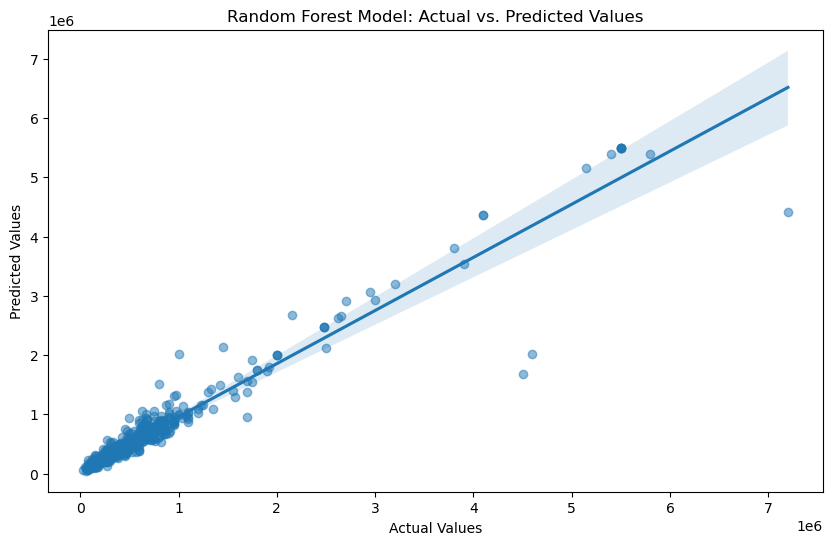

In [34]:
# Plotting for the random forest model
plt.figure(figsize=(10, 6))
sns.regplot(x=ytest, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model: Actual vs. Predicted Values')
plt.show()

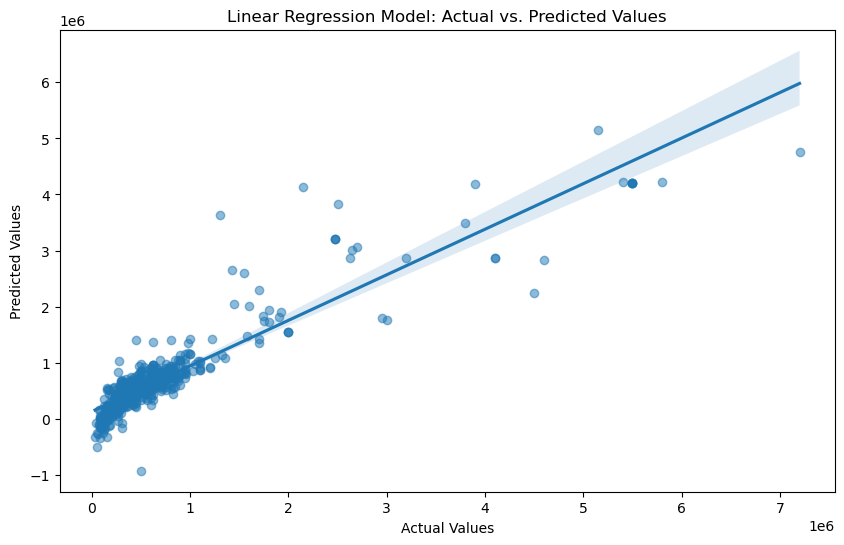

In [35]:
# Plotting for the linear regression model
plt.figure(figsize=(10, 6))
sns.regplot(x=ytest, y=reg.predict(Xtest), scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs. Predicted Values')
plt.show()